In [77]:
import tensorflow as tf
import numpy as np

# 使用 NumPy 生成假数据(phony data), 总共 100 个点.
x_data = np.float32(np.random.rand(2, 100)) # 随机输入
y_data = np.dot([0.100, 0.200], x_data) + 0.300
print(x_data.shape)
print(y_data.shape)
# 构造一个线性模型
# 
b = tf.Variable(tf.zeros([1]))
W = tf.Variable(tf.random_uniform([1, 2], -1.0, 1.0))
y = tf.matmul(W, x_data) + b
print(b.shape)
print(W.shape)

(2, 100)
(100,)
(1,)
(1, 2)


In [1]:
import tensorflow as tf
import numpy as np

# 使用 NumPy 生成假数据(phony data), 总共 100 个点.
x_data = np.float32(np.random.rand(2, 100)) # 随机输入
y_data = np.dot([0.100, 0.200], x_data) + 0.300

# 构造一个线性模型
# 
b = tf.Variable(tf.zeros([1]))
W = tf.Variable(tf.random_uniform([1, 2], -1.0, 1.0))
y = tf.matmul(W, x_data) + b

# 最小化方差
loss = tf.reduce_mean(tf.square(y - y_data))
optimizer = tf.train.GradientDescentOptimizer(0.5)
train = optimizer.minimize(loss)

# 初始化变量
init = tf.global_variables_initializer()

# 启动图 (graph)
sess = tf.Session()
sess.run(init)

# 拟合平面
for step in range(0, 201):
    sess.run(train)
    if step % 20 == 0:
        print ("step:",step, "  W:", sess.run(W), "  b:", sess.run(b))

step: 0   W: [[0.5175092  0.19309163]]   b: [0.19235003]
step: 20   W: [[0.20633246 0.24001463]]   b: [0.22119458]
step: 40   W: [[0.13783857 0.22160423]]   b: [0.26777193]
step: 60   W: [[0.11461439 0.2091503 ]]   b: [0.28709456]
step: 80   W: [[0.1057703  0.20369416]]   b: [0.29485825]
step: 100   W: [[0.10229103 0.20147474]]   b: [0.297954]
step: 120   W: [[0.10091087 0.20058712]]   b: [0.29918608]
step: 140   W: [[0.10036226 0.20023358]]   b: [0.29967627]
step: 160   W: [[0.10014408 0.20009291]]   b: [0.29987124]
step: 180   W: [[0.1000573  0.20003696]]   b: [0.29994878]
step: 200   W: [[0.10002279 0.2000147 ]]   b: [0.29997963]


In [39]:
state = tf.Variable(0, name = "counter")
one = tf.constant(1)
new_value = tf.add(state, one)
update = tf.assign(state, new_value)

init = tf.global_variables_initializer()

with tf.Session() as sess:
    sess.run(init)
    print(sess.run(state))
    
    for _ in range(3):
        print(sess.run(update))

0
1
2
3


In [48]:
# mnist 入门
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("MNIST_data/", one_hot = True)

n_classes = 10

x = tf.placeholder(tf.float32, [None, 784])
y = tf.placeholder(tf.float32, [None, n_classes])

W = tf.Variable(tf.zeros([784, n_classes]))
b = tf.Variable(tf.zeros([n_classes]))

logits = tf.nn.softmax(tf.matmul(x, W) + b)

cost = tf.reduce_sum(tf.nn.softmax_cross_entropy_with_logits(logits = logits, labels = y))
#cost = -tf.reduce_sum(tf.nn.softmax(y*tf.log(logits)))

optimizer = tf.train.GradientDescentOptimizer(0.01).minimize(cost)

correct_prediction = tf.equal(tf.argmax(logits,1), tf.argmax(y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for i in range(1001):
        batch_x, batch_y = mnist.train.next_batch(100)
        sess.run(optimizer, feed_dict={x: batch_x, y: batch_y})
        loss = sess.run(cost, feed_dict = {x: batch_x, y: batch_y})
        
        if i%200 == 0:
            print(i, loss)
    print("accuracy:", sess.run(accuracy, feed_dict = {x: mnist.test.images, y: mnist.test.labels}))

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
0 227.67087
200 161.9551
400 156.9531
600 154.85019
800 159.29391
1000 165.69943
accuracy: 0.9141


In [65]:
# mnist进阶
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("MNIST_data/", one_hot = True)

n_classes = 10

x = tf.placeholder(tf.float32, [None, 784])
y = tf.placeholder(tf.float32, [None, n_classes])

def weight_variable(shape):
    return tf.Variable(tf.truncated_normal(shape, stddev = 0.1))

def bias_variable(shape):
    return tf.Variable(tf.constant(0.1, shape = shape))

def conv2d(x, W):
    return tf.nn.conv2d(x, W, strides = [1,1,1,1], padding = 'SAME')

def max_pool(x):
    return tf.nn.max_pool(x, ksize = [1,2,2,1], strides = [1,2,2,1], padding = "SAME")

print(x.shape)
x_image = tf.reshape(x,[-1, 28, 28, 1])
print(x_image.shape),print()
y = tf.placeholder(tf.float32, [None, n_classes])

W_conv1 = weight_variable([5,5,1,32])
b_conv1 = bias_variable([32])

h_conv1 = tf.nn.relu(conv2d(x_image, W_conv1) + b_conv1)
h_pool1 = max_pool(h_conv1)
print("h_pool1.shape:", h_pool1.shape)

W_conv2 = weight_variable([5,5,32,64])
b_conv2 = bias_variable([64])

h_conv2 = tf.nn.relu(conv2d(h_pool1, W_conv2) + b_conv2)
h_pool2 = max_pool(h_conv2)
print("h_pool2.shape:", h_pool2.shape)

W_fc1 = weight_variable([7*7*64, 1024])
b_fc1 = bias_variable([1024])

h_pool2_flat = tf.reshape(h_pool2, [-1,7*7*64])
h_fc1 = tf.nn.relu(tf.matmul(h_pool2_flat, W_fc1) + b_fc1)
print("h_fc1.shape:", h_fc1.shape)

keep_prob = tf.placeholder("float")
h_fc1_drop = tf.nn.dropout(h_fc1, keep_prob)

W_fc2 = weight_variable([1024, 10])
b_fc2 = bias_variable([10])

y_conv = tf.nn.softmax(tf.matmul(h_fc1_drop, W_fc2) + b_fc2)

cost = tf.reduce_sum(tf.nn.softmax_cross_entropy_with_logits(logits = y_conv, labels = y))
optimizer = tf.train.AdamOptimizer(1e-4).minimize(cost)
correct_prediction = tf.equal(tf.argmax(y_conv, 1), tf.argmax(y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for i in range(20000):
        batch = mnist.train.next_batch(100)
        if i%1000 == 0:
            train_accuracy = accuracy.eval(feed_dict={x:batch[0], y: batch[1], keep_prob: 1.0})
            print ("step %d, training accuracy %g"%(i, train_accuracy))
            optimizer.run(feed_dict={x: batch[0], y: batch[1], keep_prob: 0.5})

    print("test accuracy %g"%accuracy.eval(feed_dict={
        x: mnist.test.images, y: mnist.test.labels, keep_prob: 1.0}))

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
(?, 784)
(?, 28, 28, 1)

h_pool1.shape: (?, 14, 14, 32)
h_pool2.shape: (?, 7, 7, 64)
h_fc1.shape: (?, 1024)
step 0, training accuracy 0.02
step 1000, training accuracy 0.07
step 2000, training accuracy 0.1
step 3000, training accuracy 0.11
step 4000, training accuracy 0.07
step 5000, training accuracy 0.1
step 6000, training accuracy 0.12
step 7000, training accuracy 0.11
step 8000, training accuracy 0.1
step 9000, training accuracy 0.1
step 10000, training accuracy 0.16
step 11000, training accuracy 0.15
step 12000, training accuracy 0.24
step 13000, training accuracy 0.26
step 14000, training accuracy 0.21
step 15000, training accuracy 0.24
step 16000, training accuracy 0.35
step 17000, training accuracy 0.3
step 18000, training accuracy 0.33
step 19000, training accuracy 0.34
test accuracy 0.

x_data.shape: (300, 1)
y_data.shape: (300, 1)


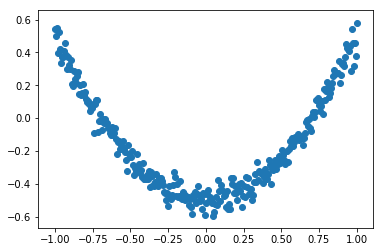

In [142]:
import tensorflow as tf 
import numpy as np
import matplotlib.pyplot as plt

def add_layer(inputs, in_size, out_size, activation_function = None):
    Weights = tf.Variable(tf.random_normal([in_size, out_size]))
    biases = tf.Variable(tf.zeros([1, out_size]) + 0.1)
    Wx_plus_b = tf.add(tf.matmul(inputs, Weights), biases)
    if activation_function is None:
        outputs = Wx_plus_b
    else:
        outputs = activation_function(Wx_plus_b)
    return outputs

x_data = np.linspace(-1, 1,300)[:,np.newaxis]
print("x_data.shape:", x_data.shape)
noise = np.random.normal(0, 0.05, x_data.shape)
y_data = np.square(x_data) - 0.5 + noise
print("y_data.shape:", y_data.shape)

xs = tf.placeholder(tf.float32, [None, 1])
ys = tf.placeholder(tf.float32, [None, 1])

hidden1 = add_layer(xs, 1, 10, activation_function = tf.nn.relu)
prediction = add_layer(hidden1, 10, 1, activation_function = None)


loss = tf.reduce_mean(tf.reduce_sum(tf.square(ys - prediction),
                                    reduction_indices = [1]))
train_step = tf.train.GradientDescentOptimizer(0.1).minimize(loss)

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.scatter(x_data, y_data)
plt.ion()
plt.show()

temp_value = []
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for i in range(1001):
        sess.run(train_step, feed_dict = {xs: x_data, ys: y_data})
        if i%50 == 0:
            #print("i:",i,"loss:",sess.run(loss, feed_dict={xs: x_data, ys: y_data}))
            try:
                ax.lines.remove(lines[0])
            except Exception:
                pass
            prediction_value = sess.run(prediction, feed_dict = {xs: x_data})
            temp_value.append(prediction_value)
            lines = ax.plot(x_data, prediction_value, 'r-', lw = 5)
            plt.pause(1)
 